In [6]:
#Requirements
import pandas as pd
import cleaning_functions
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
help(cleaning_functions)

Help on module cleaning_functions:

NAME
    cleaning_functions

FUNCTIONS
    extract_last_name(name_column)
        ##returns the last name from the name column
    
    generate_central_plot(df)
        ## returns a plot which shows survival rates by pclass
        ## expects the titanic dataframe in pandas format

DATA
    __warningregistry__ = {'version': 28, ('Setting the datapath via matpl...

FILE
    /Users/stomkins/project_code_skeleton/cleaning_functions.py




## Problem Statement
The Titanic was an ocean liner which sank on her maiden voyage in 1912. Kaggle has released a dataset of 891 passenger records from this journey. 
 

My goal with this notebook is to use to answer the question: *is class positively correlated with survival on the ship Titanic?*


## Data

To answer this question I will use a dataset from Kaggle called titanic 
(link here: [titanic dataset](https://www.kaggle.com/c/titanic)). I collected this by downloading the csv. The data is stored in a csv format. There are 891 rows and 12 columns. The total size of the file is 59 kB. 

<table><tr> <td> 
    <ul>
<li>Survival</li>
<li>Gender</li>
<li>Age</li>
<li>Class</li>
 </ul> 
  </td> 
  <td> 
 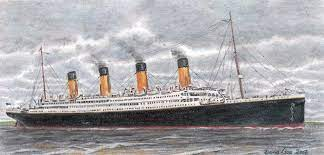
</td> 
</tr>
</table>



In [3]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.shape

(891, 12)

## Data cleaning and manipulation

To address my central question I did the following data cleaning steps:
    ....
    
This are all contained in the file data_cleaning_functions.py. 

## Analysis

To present my analysis I first consider a table of survival rates for each class. Here I can see that the proportion of passengers in the first class who survived is much higher than for the second and third classes. 

In [8]:
table = titanic_df.groupby("Pclass")["Survived"].mean()
table

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

However, it is possible that this gap is not trustworthy if there is very little data in one of these classes. So I will also plot survival and include the size of the category in the plot. 

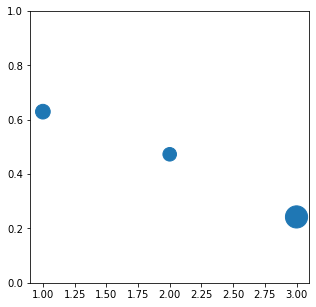

In [9]:
cleaning_functions.generate_central_plot(titanic_df)

In the plot although we can see there is more data in the third class the amount of data in the first class is not so small that I am concerned. I do think there is a statistically valid relationship between class and survival. However, to be triple sure, I'll check the correlation coefficient between plcass and survival rate and check that it is statistically significant. 

In [10]:
from scipy.stats import pearsonr


In [11]:
pearsonr(table.index,table.values)

(-0.9940243552271822, 0.06963122092061116)

Surprisingly, although the correlation coefficient is very strong negative, it is not statistically signifanct (probably because I only have three values and have lost all information about the size of the data). 


In [12]:
pearsonr(titanic_df.Pclass,titanic_df.Survived)

(-0.3384810359610153, 2.537047387978631e-25)

Now I see a weaker but much more significant relationship between the two variables. However, it the pearson correlation coefficient isn't really set up for this kind of comparison, so in future work I will use a better measure. 

## Take-aways
For now, I am convinced that as class goes up from 3 -> 1 there is an increase in survival rates. While the relationship is strong and seems to be significant, I will test the significant levels more thoroughly in future work.  

## References 

Include all references to sources for the code, sources for any packages or methods you used and a guide to all of the files you wrote and are including. 

### To display 

0. Download custom.css (from canvas) into the directory where your noteboook is
1. Open up a new terminal
2. Navigate to the directory where your notebook is 
3. Run this command ```jupyter nbconvert presentation_notebook.ipynb --to slides  --post serve```

(Replace ```presentation_notebook.ipynb``` with the name of your notebook)


### To convert to pdf

1. In the browser window where your presentation is displayed after ```.html``` copy and paste
```?print-pdf``` so that the url looks like this:
    
    ```http://127.0.0.1:8000/presentation_notebook.slides.html?print-pdf```
            
2. Select print on the page but instead of printing save as a pdf
            

### Next steps

Customize css

https://github.com/edouardfouche/kit-jupyter-slides-theme/blob/master/custom.css